 # ***Exploratory Data Analysis (EDA)***
 ### ***Aurthor: Lesala and  HALIMA (EDA Lead)***

This notebook performs exploratory and statistical analysis on the transformed dataset. The goal is to uncover initial patterns, distributions, and relationships in the data before applying mining techniques.

##  *Objectives*

- *Understand data distributions and variable types*  
- *Detect patterns and outliers* 
- *Examine relationships and correlations*  
- *Compare groups across key metrics*

In [1]:
# loading necessary libraries
import  warnings

import numpy as np    # For numerical operations
import pandas as pd     # For data manipulation and analysis
from IPython.display import display  # For displaying DataFrames as tables in Jupyter Notebook

import plotly.express as px
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # For statistical data visualization
from scipy import stats            # For statistical functions
import plotly.express as px        # For interactive visualizations
from plotly.subplots import make_subplots   # For creating subplots in Plotly
import plotly.graph_objects as go           #for creting interactive plots

warnings.simplefilter(action="ignore")   # Ignore future warnings


## *Loaing dataset*

In [2]:
# Load the dataset
df = pd.read_parquet('../data/final/olist_full_data_Loaded.parquet', engine='pyarrow')

# Quick overview
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'profit_margin',
       'freight_ratio', 'estimated_d

## *1. Understand the Structure of the Dataset*

In [3]:
df.head()  # Display the first few rows of the DataFrame

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,estimated_delay,order_processing_time,recency_days,purchase_frequency,monetary_value,product_volume_cm3,product_density,category_review_score,is_late,high_freight_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,-8,0.0,335,2,82.82,1976.0,0.25,4.09,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,-8,0.0,335,2,82.82,1976.0,0.25,4.09,0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,-8,0.0,335,2,82.82,1976.0,0.25,4.09,0,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813.0,...,-6,1.0,40,1,141.46,4693.0,0.09,4.16,0,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,...,-18,0.0,26,1,179.12,9576.0,0.04,4.09,0,0


### *Understand the Dataset Structure*

In [4]:
# Shape: rows and columns
print("Shape of the dataset:", df.shape)

# Info: data types and non-null values
print("\nDataset Info:")
print(df.info())     # Display column dtypes & null counts

Shape of the dataset: (116374, 52)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116374 entries, 0 to 116373
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116374 non-null  object        
 1   customer_id                    116374 non-null  object        
 2   order_status                   116374 non-null  category      
 3   order_purchase_timestamp       116374 non-null  datetime64[ns]
 4   order_approved_at              116359 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116374 non-null  datetime64[ns]
 6   order_delivered_customer_date  116374 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116374 non-null  datetime64[ns]
 8   customer_unique_id             116374 non-null  object        
 9   customer_zip_code_prefix       116374 non-null  object        
 10  customer_city     

 ### *Step 3: Data Cleaning — Handling  Missing Values*
* To also check for missing values, which can break calculations if not handled.

In [5]:
# Check for missing values in the entire dataset
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0].dropna())  # Display only columns with missing values

Missing Values:
 order_approved_at                  15
review_comment_title                2
review_comment_message             31
product_category_name            1641
product_category_name_english    1664
order_processing_time              15
category_review_score            1664
dtype: int64


In [6]:
##check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Convert zip code and order item ID to object (string)
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str)
df['order_item_id'] = df['order_item_id'].astype(str)

In [8]:
# Summary statistics for numeric variables
# Extract only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
numerical_df.describe().round(2)  # Round to 2 decimal places for better readability



Summary Statistics:


,price,freight_value,payment_installments,payment_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,...,estimated_delay,order_processing_time,recency_days,purchase_frequency,monetary_value,product_volume_cm3,product_density,category_review_score,is_late,high_freight_flag
count,116374.00,116374.00,116374.00,116374.00,116374.00,116374.00,116374.00,116374.00,116374.00,116374.00,...,116374.00,116359.00,116374.00,116374.00,116374.00,116374.00,116374.00,114710.00,116374.00,116374.00
mean,120.00,20.00,2.95,172.43,4.06,2105.25,30.25,16.57,23.06,35035.17,...,-11.91,0.27,242.45,1.09,381.58,15287.83,0.19,4.06,0.06,0.25
std,182.62,15.73,2.78,265.48,1.36,3768.15,16.17,13.41,11.73,29773.70,...,10.20,0.76,152.66,0.40,1680.01,23434.26,0.78,0.13,0.25,0.43
min,0.85,0.00,0.00,0.00,1.00,0.00,7.00,2.00,6.00,1003.00,...,-147.00,0.00,0.00,1.00,6.18,168.00,0.00,2.50,0.00,0.00
25%,39.90,13.08,1.00,61.40,4.00,300.00,18.00,8.00,15.00,11347.00,...,-17.00,0.00,119.00,1.00,70.12,2856.00,0.07,3.96,0.00,0.00
50%,74.90,16.29,2.00,108.59,5.00,700.00,25.00,13.00,20.00,24350.00,...,-12.00,0.00,223.00,1.00,134.40,6561.00,0.11,4.09,0.00,0.00
75%,133.00,21.18,4.00,189.25,5.00,1800.00,38.00,20.00,30.00,58220.00,...,-7.00,0.00,351.00,1.00,280.63,18427.50,0.19,4.16,0.00,0.00
max,6735.00,409.68,24.00,13664.08,5.00,40425.00,105.00,105.00,118.00,99990.00,...,188.00,32.00,728.00,16.00,109312.64,296208.00,85.23,5.00,1.00,1.00


## *Summary Statistics Overview*

### *1. Price & Freight*

*Price and freight_value show extreme outliers. The maximum price is 6735, while the mean is 120. Freight value has a max of 409.68 with a mean of 20. This suggests a heavy-tailed distribution. Consider log transformation or outlier capping before modeling.*

---

### *2. Payment Installments & Payment Value*

*Customers pay in up to 24 installments, suggesting possible credit behavior. Payment value has a large maximum (13,664.08) and a mean of 172.43, indicating a right-skewed distribution. Scaling or transformation is advisable.*

---

### *3. Product Dimensions & Weight*

*Product weight, length, width, and height show high variability. The max volume reaches nearly 300,000 cm³, pointing to potential errors or very large items. Outlier handling is necessary here too.*

---

### *4. Profitability Metrics*

*Profit margin is extremely skewed, with a max of over 13,000 and a mean of 152. Freight ratio could be informative when comparing cost vs price. These variables may benefit from normalization or log scaling.*

---

### *5. Time-related Metrics*

*On average, deliveries are early by 11.91 days, though some are late by up to 188 days. Most orders are processed on the same day. Recency spans widely, with a mean of 242 days, indicating varying customer activity.*

---

### *6. Customer Behavior*

*Most customers are one-time buyers (purchase frequency median is 1), though some have bought up to 16 times. Monetary value is highly skewed (max over 100K). Average review scores per category are high (around 4).*

---

### *7. Flags*

*Only 6% of orders are marked as late. About 25% of transactions had high freight cost. These binary flags can be useful targets for classification models.*

---

### *Action Points*

- *Handle outliers in price, weight, freight, and profit-related features.*
- *Apply feature scaling or transformations on skewed variables.*
- *Consider customer segmentation using frequency, monetary value, and recency.*
- *Target prediction for flags like is_late or high_freight_flag is feasible.*

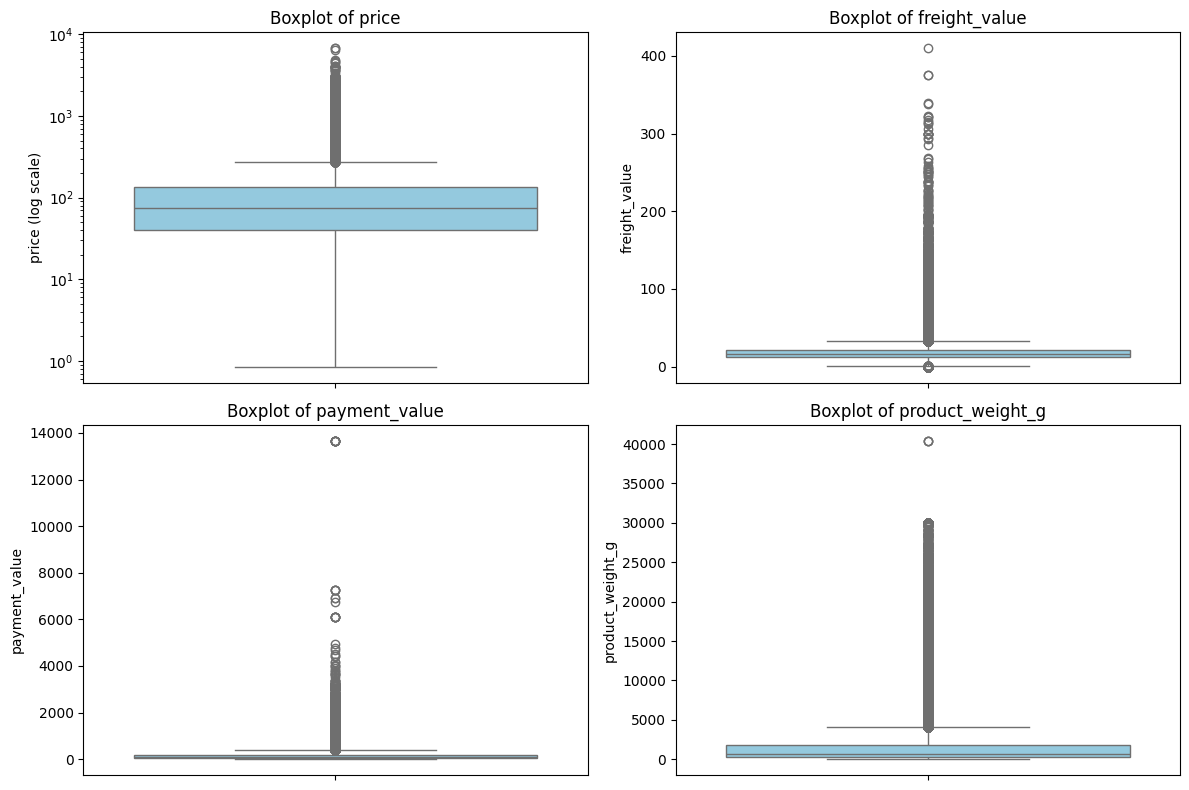

In [9]:
# List of numerical columns to check
num_cols = ['price', 'freight_value', 'payment_value', 'product_weight_g']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Plot each boxplot in a subplot (vertical)
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

    # Avoid division by zero and apply log scale if appropriate
    if df[col].min() > 0 and df[col].max() / df[col].min() > 100:
        axes[i].set_yscale('log')
        axes[i].set_ylabel(f'{col} (log scale)')

# Adjust layout
plt.tight_layout()
plt.show()

### Boxplot Analysis of Key Numerical Variables

The following boxplots illustrate the distribution of four key numerical variables in the dataset: `price`, `freight_value`, `payment_value`, and `product_weight_g`. Each variable shows distinct patterns, as outlined below:

1. **Price (log scale):**  
   The price distribution is highly right-skewed. Most prices are concentrated around lower values (approximately 100 on the log scale, which translates to about 100 in original units). There are numerous outliers extending to very high prices (above 10,000), making the log scale a helpful tool for visualization.

2. **Freight Value:**  
   Freight value also demonstrates a right-skewed distribution. The majority of values lie below 200, while a number of higher values exist as outliers, reaching up to and beyond 400.

3. **Payment Value:**  
   Payment values are predominantly below 1,000, with a long right tail. The presence of outliers, including some that go up to 14,000, highlights significant variation in payment amounts.

4. **Product Weight (in grams):**  
   The distribution of product weights is similarly skewed to the right. Most products weigh under 5,000g, though there are several heavier items that stretch beyond 40,000g, appearing as outliers.

---

### Summary

All four variables show a **right-skewed distribution** with a **significant number of high-value outliers**. This indicates that while most values are clustered in a lower range, there are a few instances with much higher values, which could be influential in further statistical analyses or predictive modeling.


## *Handling outliers*



In [10]:
# List of numeric columns to remove outliers from
num_cols = ['price', 'freight_value', 'payment_value', 'product_weight_g']

# Remove outliers from each column in-place
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR     # removing 1.5 times the IQR below Q1
    upper = Q3 + 1.5 * IQR     # removing 1.5 times the IQR above Q3
    initial_rows = df.shape[0]
    
    # Keep only rows within bounds
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    print(f"{col}: Removed {initial_rows - df.shape[0]} outliers")

# Final shape of df
print("Remaining rows after outlier removal:", df.shape)


price: Removed 8708 outliers
freight_value: Removed 10502 outliers
payment_value: Removed 4223 outliers
product_weight_g: Removed 8933 outliers
Remaining rows after outlier removal: (84008, 52)


## *Univariate Analysis*

### *Numerical coloumns*

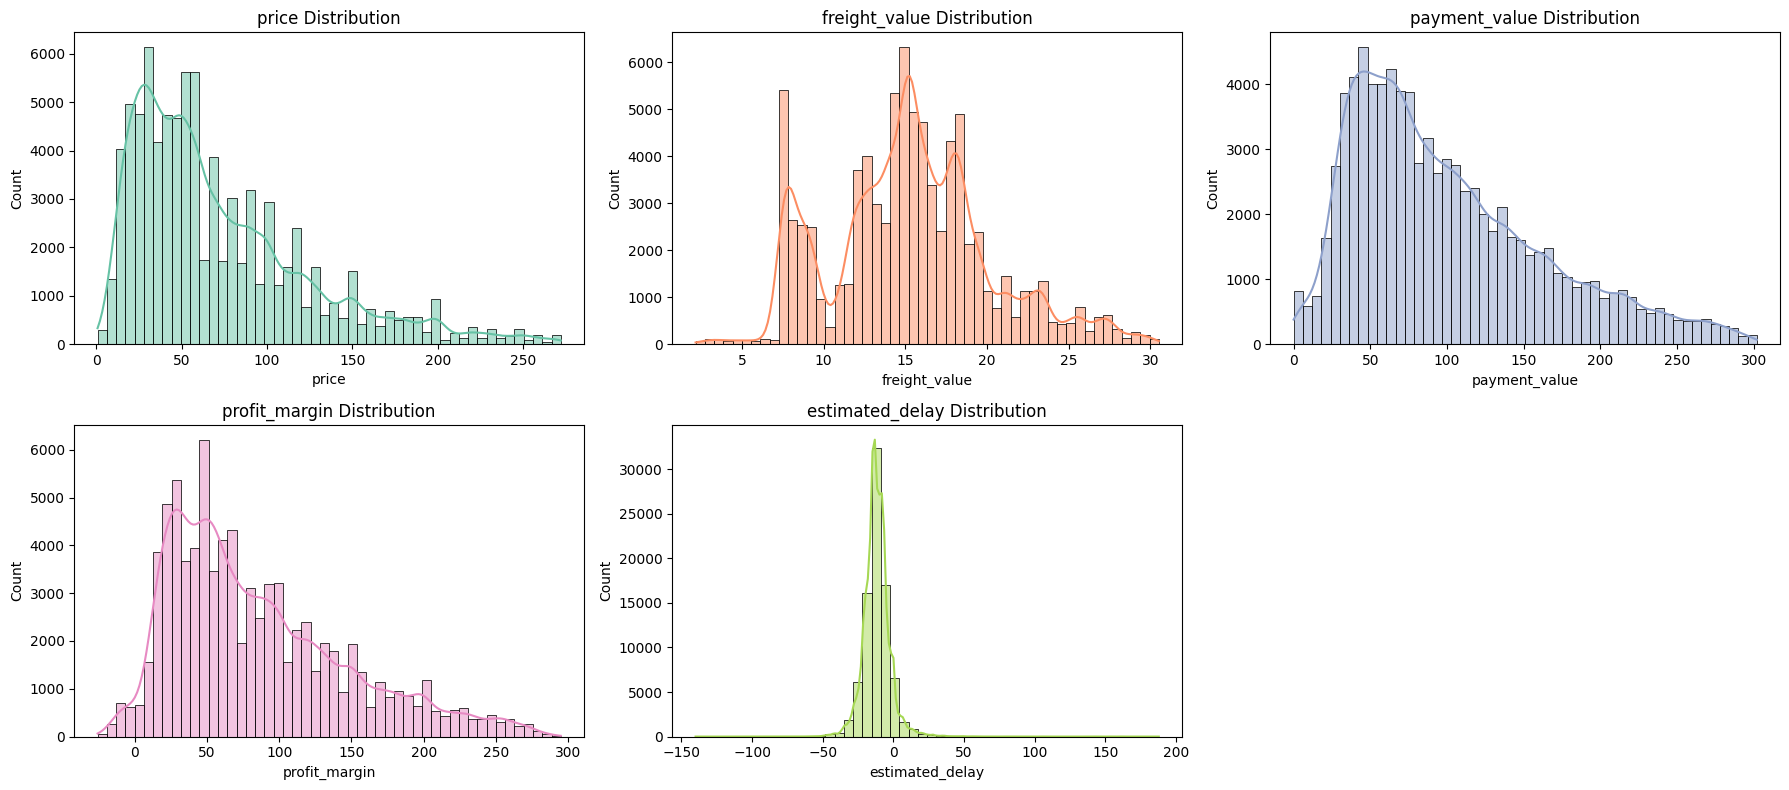

In [11]:
cols_to_plot = ['price', 'freight_value', 'payment_value', 'profit_margin', 'estimated_delay']
colors = sns.color_palette("Set2", len(cols_to_plot))  # 5 distinct colors

# Set up 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

# Plot only for the 5 specified columns
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Turn off the unused 6th subplot
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### *Distribution Analysis Summary*

*The distributions of key numeric variables were visualized using histograms with KDE plots. The following insights were derived:*

1. *The **price** variable is right-skewed, with most values concentrated between 30–40 and a long tail indicating few high-priced outliers.*

2. *The **freight_value** distribution is also right-skewed, peaking around 7–8, with a secondary bump near 15, and a long tail toward higher values.*

3. *Similar to price, **payment_value** is concentrated at lower amounts (30–40), with decreasing frequency at higher values, indicating a right-skewed pattern.*

4. *The **profit_margin** variable follows a right-skewed distribution as well, with most values between 10–20 and fewer occurrences of large profits. The presence of some negative margins is possible but limited.*

5. *In contrast, **estimated_delay** displays a near-normal distribution centered sharply at zero, suggesting that most deliveries occurred on time, with fewer cases of early or delayed arrivals.*

*These patterns highlight common characteristics of transactional and logistical data, such as skewness in monetary values and punctual delivery systems.*


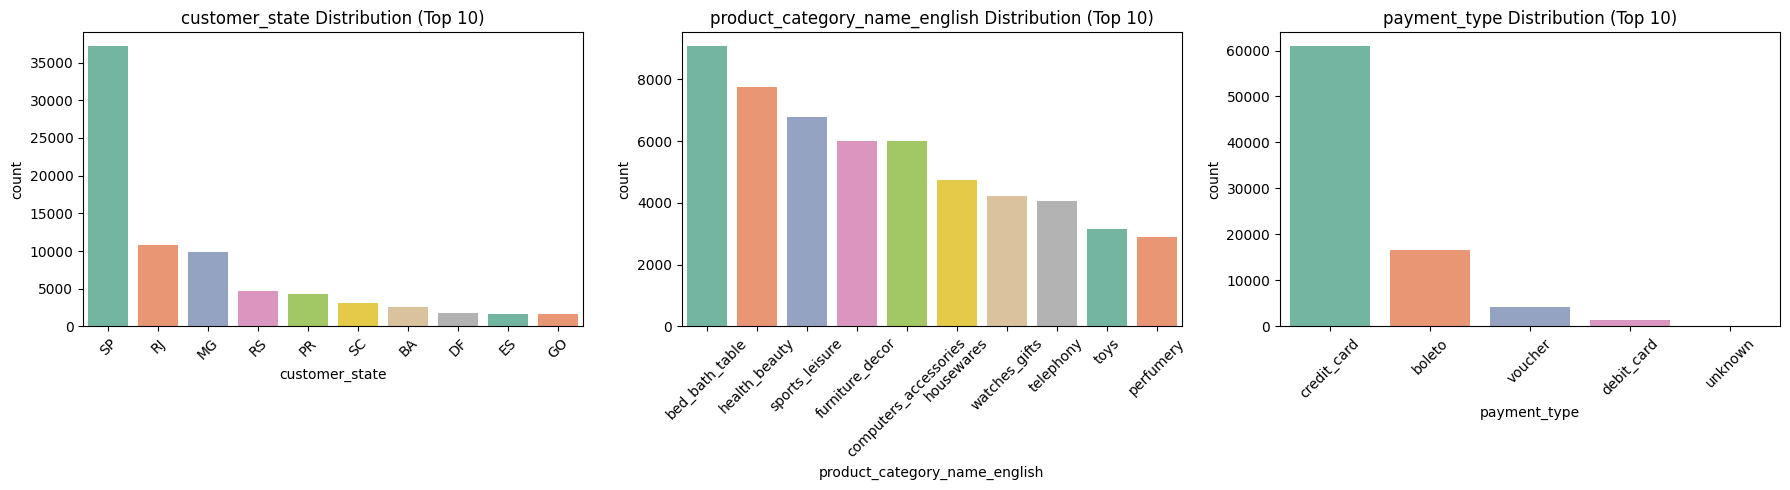

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for delivered orders
delivered_df = df[df['order_status'] == 'delivered']

# Select categorical columns to visualize
cat_cols = ['customer_state', 'product_category_name_english', 'payment_type']

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot
for i, col in enumerate(cat_cols):
    sns.countplot(data=delivered_df, x=col, ax=axes[i], palette='Set2', 
                  order=delivered_df[col].value_counts().index[:10])
    axes[i].set_title(f'{col} Distribution (Top 10)')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### *(Top 10 Categorical Distributions)*

#### *1. Distribution of Customer States (Top 10)*

* The chart illustrates the number of customers from the top 10 Brazilian states.
* The state of *São Paulo (SP)* clearly leads with the highest number of customers, exceeding *35,000*. This suggests that a large portion of the platform’s customer base is concentrated in this metropolitan area.
* Following SP, the states of *Rio de Janeiro (RJ)* and *Minas Gerais (MG)* have the next highest counts, both below *10,000*, but still significantly higher than the rest.
* The remaining states—*Rio Grande do Sul (RS)*, *Paraná (PR)*, *Santa Catarina (SC)*, *Bahia (BA)*, *Distrito Federal (DF)*, *Espírito Santo (ES)*, and *Goiás (GO)*—have customer counts ranging from approximately *2,000 to 4,000*.
* *Interpretation:* The distribution is heavily skewed towards a few dominant states, especially *SP*, showing a clear regional concentration. This could be due to population density, urbanization, or economic activity in those areas.

#### *2. Distribution of Product Categories (Top 10)*

* This bar chart highlights the most frequently purchased product categories, translated into English.
* The category *"bed\_bath\_table"* stands out as the most popular, with close to *9,000* purchases. This suggests a strong customer interest in home and living-related products.
* *"health\_beauty"* and *"sports\_leisure"* follow closely behind, with sales figures ranging from *6,000 to 8,000*. These indicate active segments in wellness and recreational goods.
* Categories such as *"furniture\_decor"*, *"computers\_accessories"*, *"housewares"*, and *"watches\_gifts"* appear in the mid-range of popularity.
* Lower-ranking categories in the top 10 include *"telephony"*, *"toys"*, and *"perfumery"*, with *"perfumery"* recording slightly under *3,000* sales.
* *Interpretation:* Household items, beauty products, and sports equipment are among the top-selling product types. This could reflect consumer lifestyle priorities and seasonal or practical shopping patterns.

#### *3. Distribution of Payment Types (Top 10)*

* This visualization shows the most common payment methods used by customers.
* *"credit\_card"* is by far the most used payment method, with transaction counts exceeding *60,000*. It dominates the payment landscape, implying both convenience and consumer trust in card-based transactions.
* *"boleto"*, a popular local payment slip method in Brazil, ranks second with approximately *16,000* transactions. While significantly lower than credit card usage, it still represents a meaningful portion of the total.
* Other methods like *"voucher"* and *"debit\_card"* are used far less frequently, both falling under *5,000* transactions.
* There is also an *"unknown"* category with very few entries, which may indicate missing or unclassified data.
* *Interpretation:* Credit cards are overwhelmingly the preferred method of payment, highlighting the dominance of digital financial transactions in e-commerce. The noticeable use of *boleto* also reflects regional payment preferences.

---


## *Bivariate Analysis*

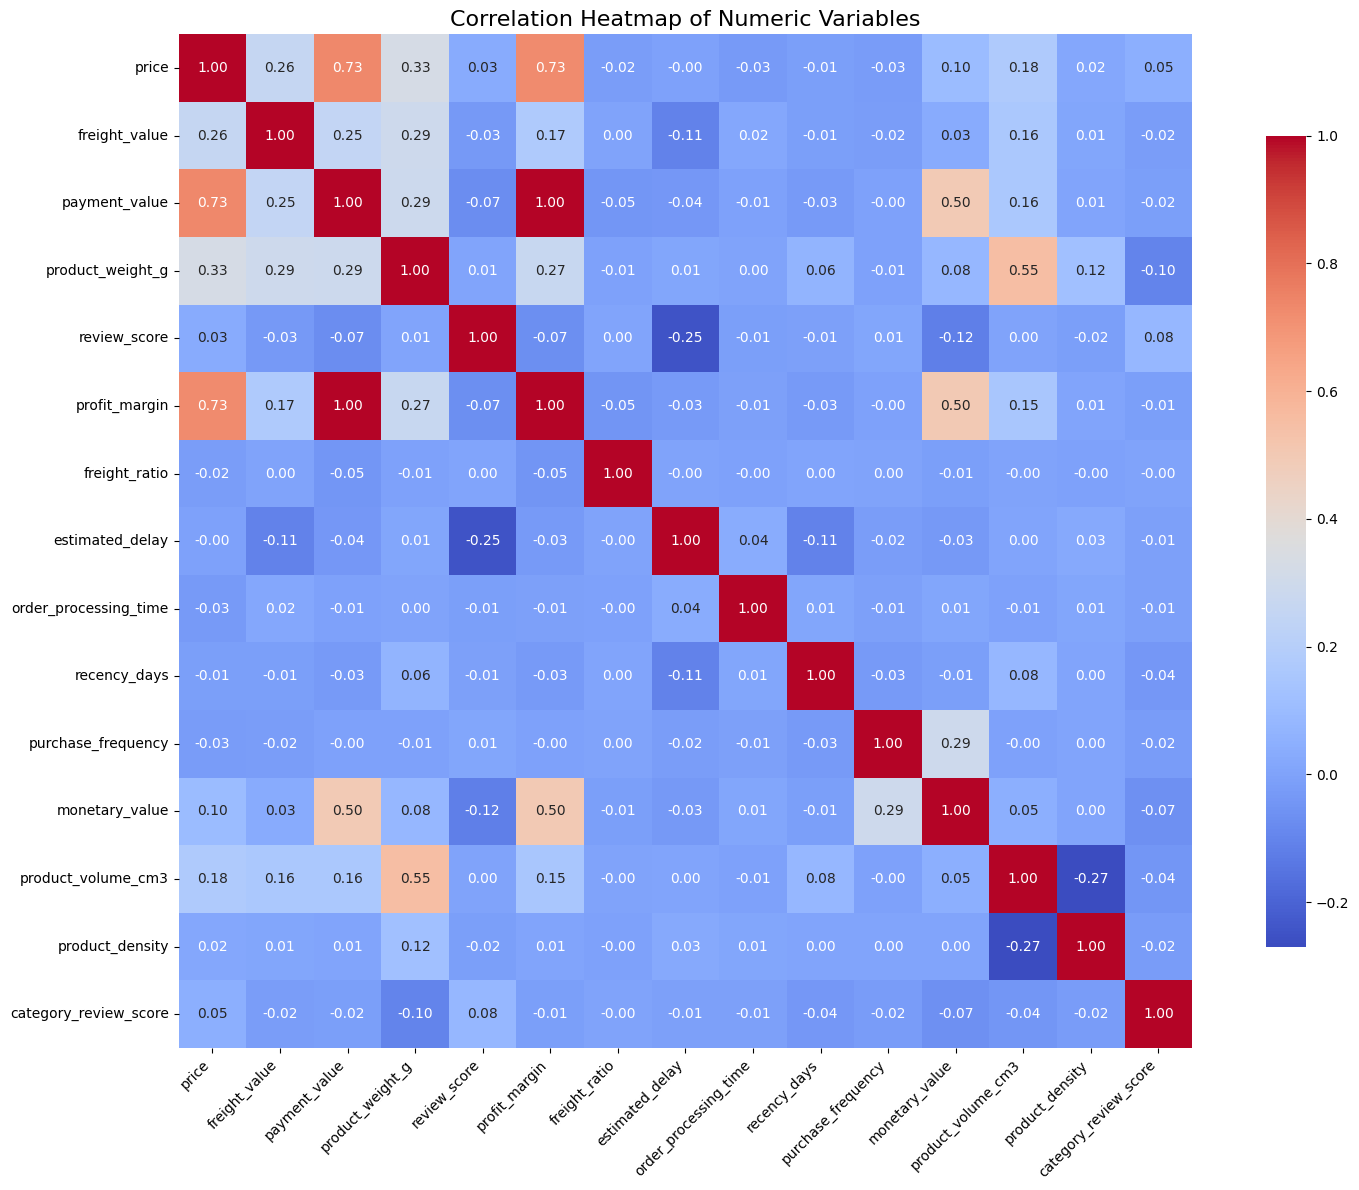

In [13]:
# Correlation matrix
corr_matrix = df[[
    'price', 'freight_value', 'payment_value', 'product_weight_g',
    'review_score', 'profit_margin', 'freight_ratio', 'estimated_delay',
    'order_processing_time', 'recency_days', 'purchase_frequency',
    'monetary_value', 'product_volume_cm3', 'product_density',
    'category_review_score'
]].corr()

# Larger heatmap plot
plt.figure(figsize=(16, 12))  # Adjust size here
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Optional: better readability
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label cutoff
plt.show()


### *Correlation Heatmap Interpretation*

*The heatmap shows Pearson correlation coefficients between numeric variables. The values range from -1 to 1, indicating the direction and strength of the relationship.*

### *Key Correlations:*

*1. profit_margin and payment_value: `1 (Very Strong Positive)`*  
*Higher payment values are associated with higher profit margins. This suggests that customers who spend more tend to generate more profit. Focus on encouraging higher cart values.*

*2. price and freight_value: `0.73 (Strong Positive)`*  
*More expensive products usually have higher shipping costs. This may be due to size, weight, or delivery options. Consider freight cost strategies for high-priced items.*

*3. monetary_value and payment_value: `0.50 (Moderate Positive)`*  
*Customers who spend more per order also tend to have a higher overall monetary value. They are ideal for loyalty and retention programs.*

*4. monetary_value and price: `0.26 (Weak Positive)`*  
*Customers with higher lifetime value may slightly prefer more expensive products, but the correlation is weak. Many may buy frequently at lower prices.*

*5.product_weight_g and product_volume_cm3: `0.55 (Moderate Positive)`*
*Heavier products tend to have larger volumes, which is expected. This relationship can help in logistics and inventory management.*

### *Summary:*

*Strong positive relationships exist between payment_value and both profit_margin and monetary_value. These insights can support pricing, marketing, and customer segmentation strategies.*


### *Boxplot of Price by Product Category*

In [14]:
category_type_map = {
    # Electronics & Tech
    'electronics': ['telephony', 'computers', 'audio', 'electronics', 'tablets_printing_image'],
    
    # Fashion
    'fashion': ['fashion_bags_accessories', 'fashion_male_clothing', 'fashion_female_clothing',
                'fashion_shoes', 'fashion_underwear_beach', 'fashion_sport', 'fashion_childrens_clothes'],
    
    # Home & Furniture
    'home': ['bed_bath_table', 'furniture_decor', 'housewares', 'home_appliances', 'kitchen_dining_laundry_garden_furniture'],
    
    # Beauty & Health
    'health_beauty': ['perfumery', 'health_beauty', 'diapers_and_hygiene'],
    
    # Sports & Leisure
    'sports_leisure': ['sports_leisure', 'toys', 'books_general_interest', 'cds_dvds_musicals', 'music'],
    
    # Auto & Tools
    'auto_tools': ['auto', 'construction_tools_construction', 'construction_tools_lights',
                   'construction_tools_tools', 'construction_tools_safety'],
    
    # Office & School
    'office_school': ['office_furniture', 'stationery', 'books_technical', 'books_imported'],
    
    # Others
    'other': ['pet_shop', 'baby', 'watches_gifts', 'cool_stuff', 'flowers', 'garden_tools', 
              'luggage_accessories', 'market_place', 'drinks', 'food', 'fashion', 'art',
              'air_conditioning', 'security_and_services', 'agro_industry_and_commerce',
              'industry_commerce_and_business', 'signaling_and_security', 'arts_and_craftmanship']
}


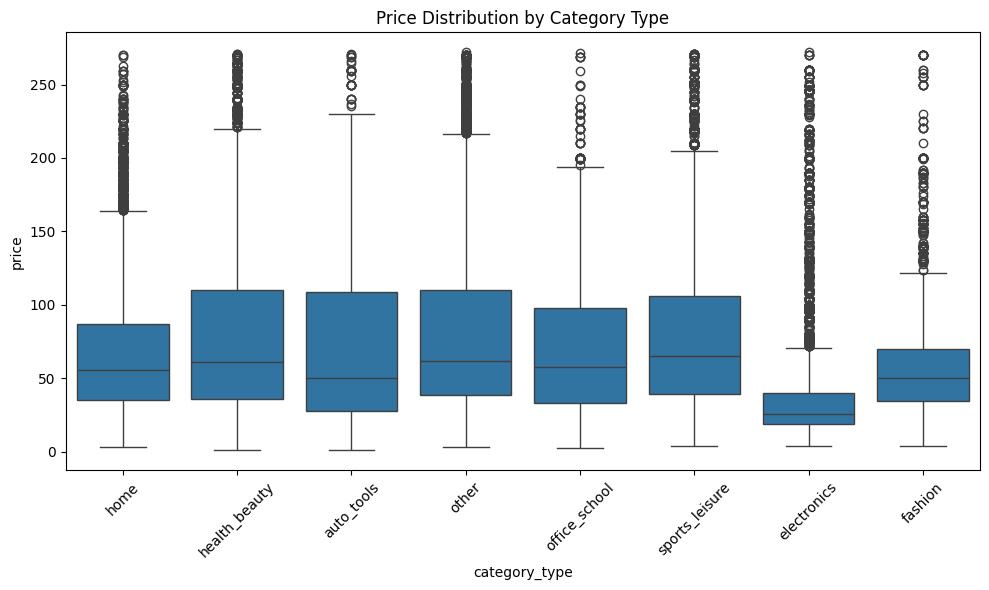

In [15]:
# Reverse the dictionary: map category to group
category_to_group = {}
for group, categories in category_type_map.items():
    for cat in categories:
        category_to_group[cat] = group

# Apply mapping
df['category_type'] = df['product_category_name_english'].map(category_to_group).fillna('other')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category_type', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Category Type')
plt.tight_layout()
plt.show()


## *Summary of Findings*  
*This box plot illustrates the distribution of prices across eight different product categories. The key takeaway is that while most categories have a similar median price and spread, the electronics category is a significant outlier. It has the lowest median price and the smallest price range for the bulk of its items, but also exhibits a large number of high-priced outliers, indicating a highly polarized market.*

*Detailed Interpretation*  

*Median Prices (Center Line of the Box):*  
*– Electronics has the lowest median price, approximately $25–$30.*  
*– Other categories like health_beauty, auto_tools, other, office_school, and sports_leisure have higher and relatively similar medians, clustering around $50–$75.*  
*– Home and fashion fall between these two price clusters.*

*Price Variability (Size of the Box & Whiskers):*  
*– Electronics shows the least variability in its core product prices, with a very narrow interquartile range.*  
*– Health_beauty, auto_tools, and sports_leisure have wider price ranges, reflecting greater diversity in standard product prices.*

*Outliers (The Circles):*  
*– Most categories show a large number of high-priced outliers, suggesting the presence of premium items beyond the typical price range.*  
*– Electronics stands out, combining a low median with a large number of expensive outliers above $250.*  
*– Home, health_beauty, and auto_tools also display many high-priced outliers.*

*Conclusion*  
*The data suggests two different market structures:*
*– Most categories consist of moderately priced core products with some premium items.*  
*– Electronics, on the other hand, has a large base of low-cost items and an extensive selection of high-priced offerings, showing a strongly polarized pricing model.*


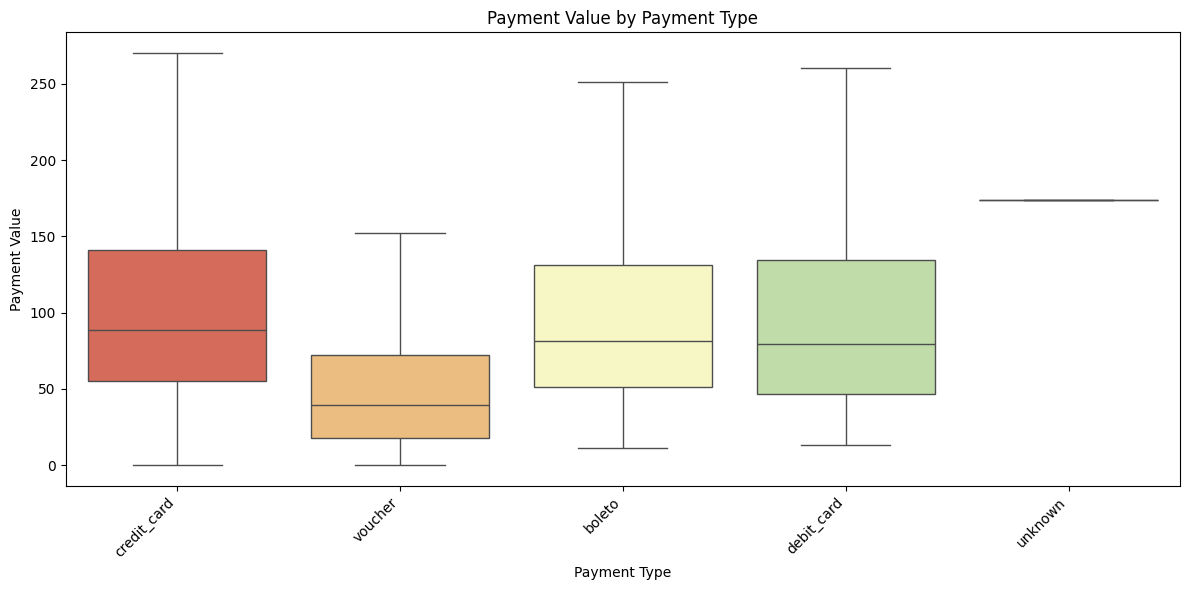

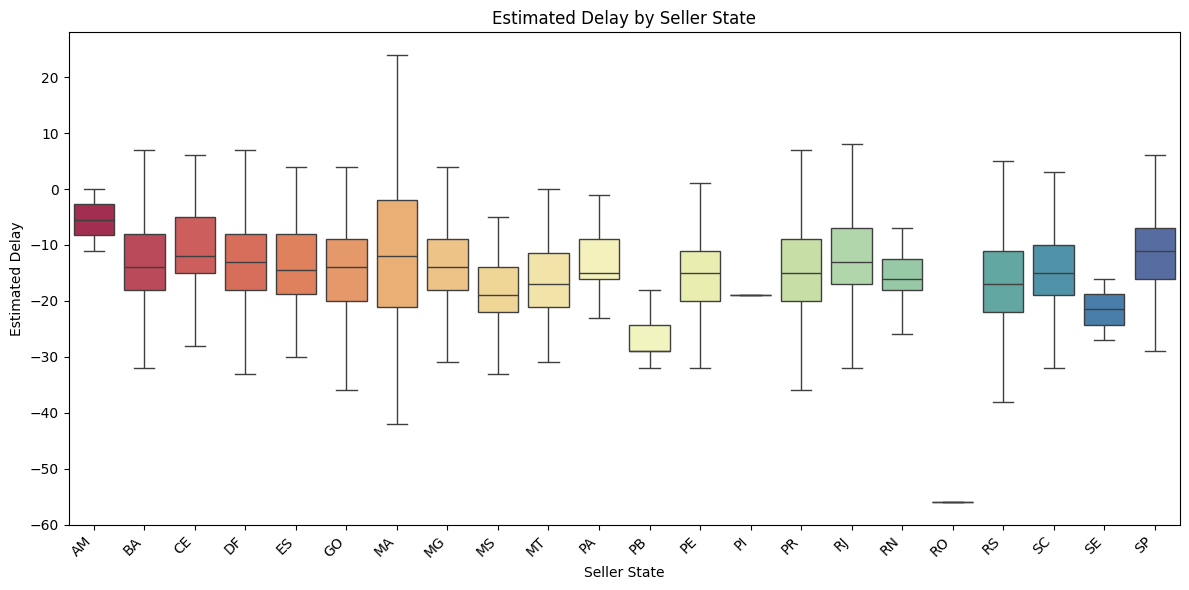

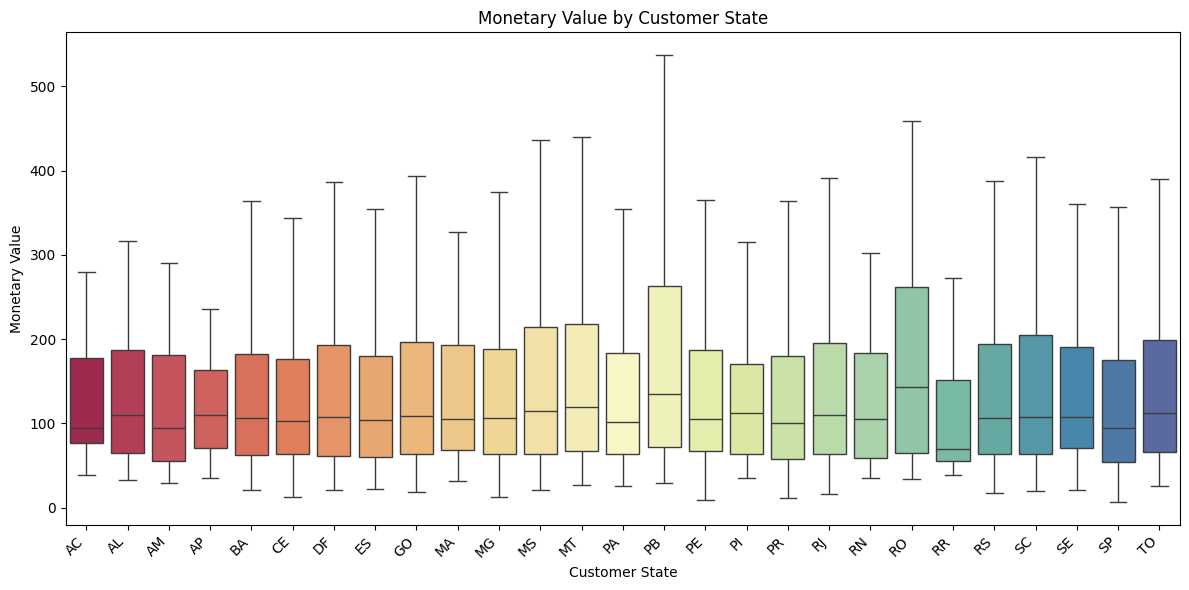

In [16]:
plots = [
    ("payment_type", "payment_value"),
    ("seller_state", "estimated_delay"),
    ("customer_state", "monetary_value"),
]

for cat, num in plots:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x=cat,
        y=num,
        palette="Spectral",
        showfliers=False,
    )
    plt.title(f"{num.replace('_', ' ').title()} by {cat.replace('_', ' ').title()}")
    plt.xlabel(cat.replace("_", " ").title())
    plt.ylabel(num.replace('_', ' ').title())
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



### *1. Payment Value by Payment Type*

*Observations:*

*Credit card transactions exhibit the highest median payment value among all payment types.*

*The interquartile range (IQR) for credit card payments is also relatively wide, indicating significant variability in transaction amounts.*

*Voucher payments are tightly clustered with a low median, showing that they are used for smaller transactions.*

*Debit card and boleto payments fall in the middle, both in terms of median and spread.*

*Interpretation:*

*Credit cards are associated with a higher and more variable range of payments, indicating that customers prefer this method for diverse transaction sizes. In contrast, vouchers are used for minimal payments, suggesting they may be reserved for promotional or specific low-value purchases.*

---

### *2. Estimated Delay by Seller State*

*Observations:*

*The majority of seller states have a median estimated delay close to zero, indicating timely deliveries.*

*Some states, such as SP (São Paulo) and MG (Minas Gerais), show wider distributions of delays, with noticeable outliers.*

*The boxplot indicates that while most sellers maintain timely delivery, a few states experience significant delays.*

*Outliers indicate occasional extreme delays beyond typical shipping times.*

*Interpretation:*

*While delivery performance is consistent across most seller states, variability in certain regions (notably SP and MG) suggests potential logistical inefficiencies or higher order volumes contributing to occasional delays.*

---

### *3. Monetary Value by Customer State*

*Observations:*

*SP (São Paulo) customers show the highest median monetary value, suggesting higher average spending per customer.*

*States such as RJ (Rio de Janeiro) and MG (Minas Gerais) also show moderate median spending but lower than SP.*

*Several states, particularly those with fewer observations, have tighter IQRs and lower medians.*

*The spread in SP and RJ suggests a wider range of spending behavior among customers.*

*Interpretation:*

*Customer purchasing power appears to be highest in SP, followed by RJ and MG. This may reflect urban concentration, income levels, or access to a broader range of products and sellers.*


### *Average Review score by Delivery delay catagory*

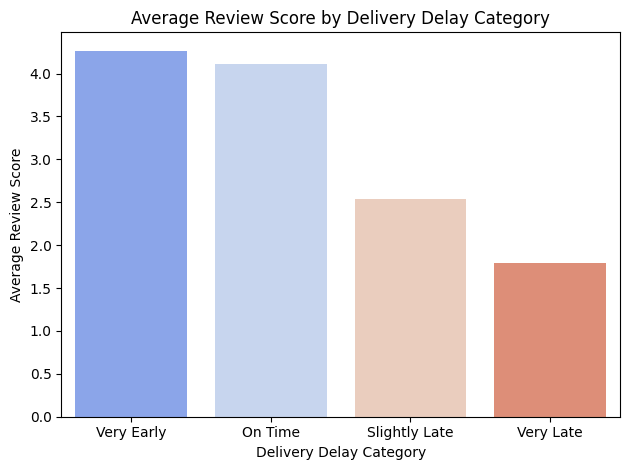

In [17]:
# Group estimated delivery delay into buckets
df['delay_bucket'] = pd.cut(df['estimated_delay'],
                            bins=[-float('inf'), -10, 0, 10, float('inf')],
                            labels=['Very Early', 'On Time', 'Slightly Late', 'Very Late'])

# Calculate average review score per delay group
avg_review = df.groupby('delay_bucket')['review_score'].mean().reset_index()

# Plot average review score by delivery delay bucket
import seaborn as sns
sns.barplot(data=avg_review, x='delay_bucket', y='review_score', palette='coolwarm')
plt.title("Average Review Score by Delivery Delay Category")
plt.xlabel("Delivery Delay Category")
plt.ylabel("Average Review Score")
plt.tight_layout()
plt.show()


### *Key Finding*  
*There is a *strong negative correlation* between delivery delays and customer review scores. As delivery time increases beyond the expected date, customer satisfaction drops significantly.*

### *Detailed Observations*  
- *Very Early* and *On Time* deliveries yield the *highest* review scores.  
  - *Very Early*: ~4.2 average rating  
  - *On Time*: ~4.1 average rating  
- *Slightly Late* deliveries cause a steep decline in satisfaction.  
  - Average score drops to ~2.5, a ~1.6-point drop from "On Time."  
- *Very Late* deliveries show the *lowest* satisfaction levels.  
  - Average score falls to ~1.8.

### *Conclusion & Business Implication*  
Timely delivery is *critical* for customer satisfaction. Even minor delays result in a *dramatic drop* in review scores. Businesses should prioritize *on-time performance* as a key part of their customer service and reputation strategy.


## *Time-Based Analysis*

### *Number of Purchases per Month*

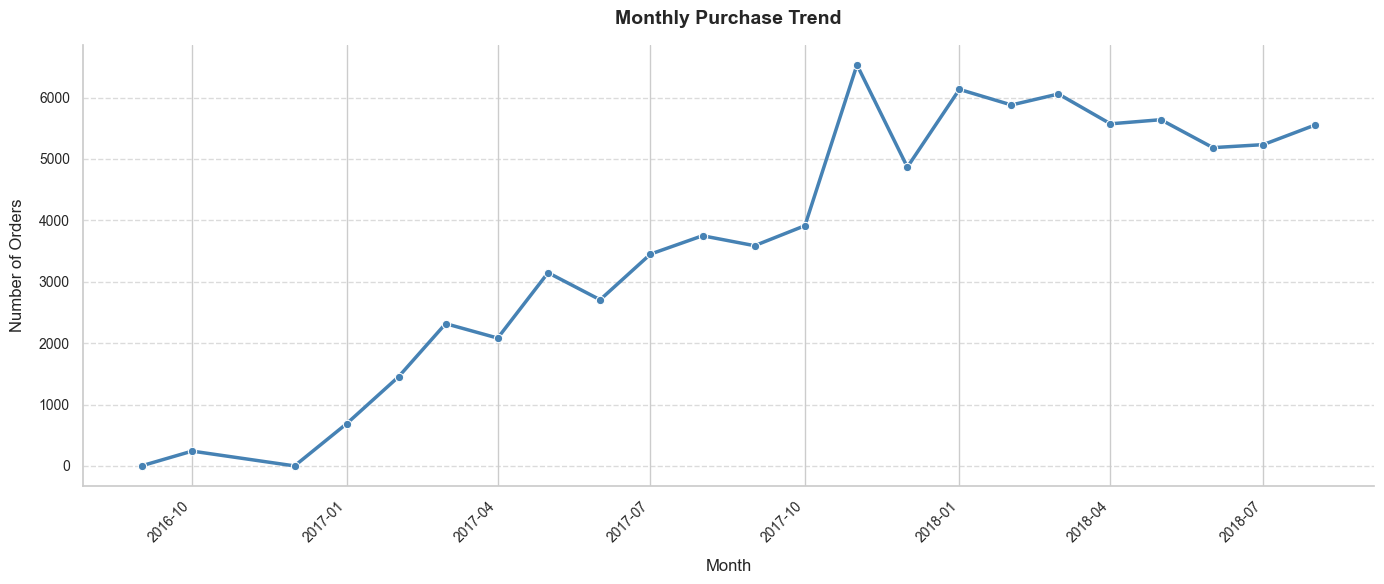

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the figure
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

# Group by month and count orders
monthly_orders = (
    df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))
    .size()
    .reset_index(name='num_orders')
)
monthly_orders['purchase_month'] = monthly_orders['order_purchase_timestamp'].dt.to_timestamp()

# Lineplot with customizations
sns.lineplot(data=monthly_orders, x='purchase_month', y='num_orders',
             marker='o', linewidth=2.5, color='steelblue')

# Customize ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=12, labelpad=10)
plt.ylabel("Number of Orders", fontsize=12, labelpad=10)
plt.title("Monthly Purchase Trend", fontsize=14, weight='bold', pad=15)

# Remove top and right borders
sns.despine()

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout adjustment
plt.tight_layout()
plt.show()


*In this section, we analyze the number of orders placed each month over a two-year period, from September 2016 to August 2018. The data is aggregated to show the total number of orders for each month.*

*Overall Trend*  
This line chart illustrates a *powerful growth story* over a two-year period, from *September 2016 to August 2018*. The number of orders shows a *significant and sustained upward trajectory*, indicating *successful business expansion* and *market traction*.

*Detailed Breakdown of Trends*  

- *Initial Stage (September 2016 - January 2017)*:  
  The business begins with a *very low order volume*, starting near zero and growing slowly over the first few months. This is *typical for a new venture* finding its footing.

- *Rapid Growth Phase (February 2017 - November 2017)*:  
  Starting in early 2017, the business enters a period of *aggressive and consistent growth*. The number of orders climbs *steeply month-over-month*.  
  This rapid ascent culminates in a *sharp peak in November 2017*, with the number of orders *exceeding 6,000*. This peak is likely driven by *seasonal shopping events* like `*Black Friday* and *pre-holiday sales*.`

- *Maturity and High-Volume Plateau (December 2017 - August 2018)*:  
  Following the November peak, there is a *significant drop* in December 2017, though the volume remains *substantially higher* than the previous year.  
  For the remainder of the period shown, the business establishes a *new, higher baseline* for orders. The volume *consistently fluctuates* in a *high range*, mostly between *5,000 and 6,000 orders per month*.  
  This indicates that the growth achieved in 2017 was *not temporary*; the business has *successfully scaled* and is now operating at a *much higher level of activity*.

*Conclusion & Business Implication*  
The data clearly shows a business that has *successfully transitioned from a startup phase to a mature, high-volume operation*. The key challenge illustrated by the chart is *managing the seasonality and fluctuations* that come with a larger scale.  
The primary business implication is that *strategies should now focus on sustaining this high volume*, *optimizing operations for peak demand* (like the one seen in November), and *identifying new avenues for the next phase of growth*.



### *Average Delivery Time Over Time*

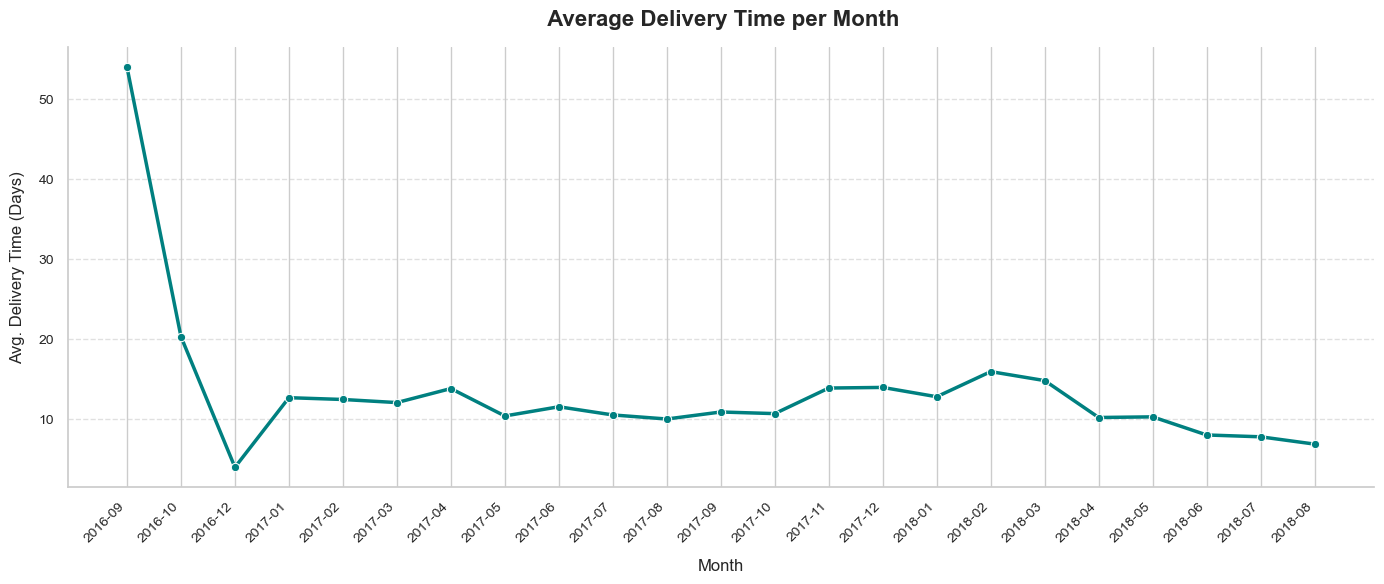

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for consistent styling
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_delivery,
    x='purchase_month',
    y='actual_delivery_time',
    marker='o',
    linewidth=2.5,
    color='teal'
)

# Customize title and axis labels
plt.title(" Average Delivery Time per Month", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=12, labelpad=10)
plt.ylabel("Avg. Delivery Time (Days)", fontsize=12, labelpad=10)

# Customize ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add horizontal gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove unnecessary borders
sns.despine()

# Ensure layout fits nicely
plt.tight_layout()
plt.show()


### *Line Plot Interpretation: Average Delivery Time per Month (Sep 2016 – Aug 2018)*

The line plot titled *"Average Delivery Time per Month"* presents the average number of days required to deliver orders over a two-year span, from *September 2016 to August 2018*.

---

#### *Initial High and Sharp Decrease (Sep 2016 – Dec 2016)*

The average delivery time began extremely high in *September 2016*, peaking at around *53 days*. However, by *December 2016*, it had drastically decreased to approximately *5 days*.  
This dramatic decline indicates a *rapid improvement in logistics and delivery processes*, likely due to early-stage inefficiencies being resolved.

---

#### *Period of Stabilization (Jan 2017 – Jul 2017)*

From *January 2017 to July 2017*, delivery times stabilized. The average hovered between *10 and 14 days*, with a minor peak in *April 2017* at around *14 days*.  
This period reflects a *steady and reliable delivery performance*, suggesting the business maintained reasonable efficiency after the initial correction.

---

#### *Slight Increase and Plateau (Aug 2017 – Feb 2018)*

Between *August 2017 and February 2018*, average delivery time *gradually increased*, peaking at around *16 days* in *February 2018*.  
Following the peak, the delivery time plateaued, fluctuating between *13 and 15 days*.  
This phase may indicate *growing order volume*, *logistical strain*, or *seasonal demand* affecting delivery performance.

---

#### *Recent Decline (Mar 2018 – Aug 2018)*

From *March to August 2018*, delivery times showed a *downward trend*, eventually reaching about *7 days* in *August 2018*.  
This suggests a *renewed operational efficiency* or *logistics optimization*, possibly following investments in infrastructure or better supply chain practices.

---

### *Conclusion & Business Implications*

The overall trend illustrates a *dramatic early improvement*, followed by *stable and manageable delivery times* with *minor seasonal fluctuations*.  
The *recent decline* in delivery duration shows that the company has likely *invested in operational efficiencies*. This positions the business well for *scaling*, as efficient delivery is a cornerstone of *customer satisfaction and retention*.

## *Customer Behavior (RFM)* 

### *RFM Analysis: Recency vs Monetary Value*

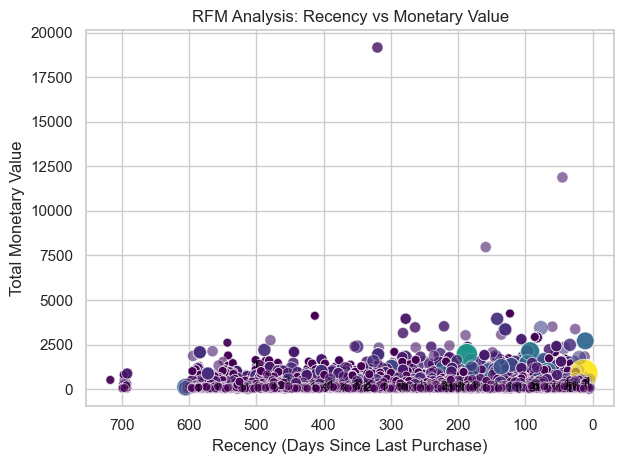

In [ ]:
# Scatterplot: Recency vs Monetary, sized by Frequency
sns.scatterplot(
    data=df, 
    x='recency_days', 
    y='monetary_value',
    size='purchase_frequency', 
    hue='purchase_frequency',
    palette='viridis', 
    alpha=0.6,
    sizes=(40, 400),  # Control the bubble size range
    legend=False
)

# Invert x-axis: smaller recency (more recent) on the left
plt.gca().invert_xaxis()

# Annotate each point (optional: limit to top 100 for clarity)
for i in range(min(100, len(df))):  # Annotate up to 100 points
    plt.text(
        df['recency_days'].iloc[i],
        df['monetary_value'].iloc[i],
        str(df['purchase_frequency'].iloc[i]),
        fontsize=8,
        ha='center',
        va='center',
        color='black',
        alpha=0.7
    )

# Final plot formatting
plt.title("RFM Analysis: Recency vs Monetary Value")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Total Monetary Value")
plt.tight_layout()
plt.show()


*This scatter plot displays an RFM (Recency, Frequency, Monetary) Analysis, specifically focusing on Recency vs. Monetary Value.*

*X-axis: Recency (Days Since Last Purchase)*  
*This axis represents how recently a customer made a purchase. Lower values (closer to 0) mean more recent purchases, indicating more active customers. Higher values mean a longer time since the last purchase, indicating less active or dormant customers.*

*Y-axis: Total Monetary Value*  
*This axis represents the total amount of money a customer has spent. Higher values indicate customers who spend more.*

*Bubble Size and Color (Implicit Frequency/Other Dimension)*  
*While not explicitly labeled, in RFM scatter plots, the size and/or color of the bubbles often represent the Frequency (how often a customer purchases) or another relevant dimension. In this specific plot, it appears that larger, often lighter-colored (yellow/teal) circles tend to be clustered towards lower recency values, suggesting that more recent and higher-spending customers might also be frequent purchasers.*

*Interpretation:*

1. *Concentration of Customers:*  
   *Most customers are clustered at lower monetary values (below 5000) and across a wide range of recency values, though a denser concentration seems to be between 0 and 200 days recency.*

2. *Recent & High-Value Customers (Lower Recency, Higher Monetary):*  
   *There are a few key data points showing customers with very low recency (close to 0 days) who also have high monetary values (e.g., above 10,000, and one almost 20,000). These are likely "Best Customers" or "Champions" who have purchased recently and spent a lot. The larger, lighter-colored circles in this region further highlight their importance.*

3. *Recent & Lower-Value Customers (Lower Recency, Lower Monetary):*  
   *A large cluster of points exists near 0 recency and lower monetary values, representing customers who have recently purchased but don't spend as much.*

4. *Lapsed Customers (Higher Recency):*  
   *As recency increases (moving to the left on the x-axis, towards 700 days), the monetary values generally tend to be lower, and the density of points decreases. This indicates lapsed or at-risk customers who haven't purchased in a long time and generally had lower spending habits.*

5. *Outliers:*  
   *There are individual data points that stand out, such as the one around 300 days recency with a monetary value close to 19,000, and another around 80 days recency with a monetary value above 11,000. These are important customers despite their slightly higher recency compared to the "Best Customers" at 0 recency.*

*In essence, the plot helps identify different customer segments: those who are recently active and valuable (bottom-right, especially large bubbles), those who are recent but lower value, and those who are lapsed (left side).*
